# SENG5199-003 Big Data Strategies and Analytics
## *Python Homework Assignment*

# Team Cerberus: Collin Jasnoch, Ben Wenner, Donald Sawyer

### *April 15, 2016*



Introduction:
=============

Welcome to the big scary homework. :) Hopefully between the similar examples in the in-class exercise and the Slack help channel we'll all get through this pretty easily. Please, please, please try some stuff out early on. The exercises build on each other so getting help early is essential.

Tips:
- Break your code up into a bunch of smallish cells (maybe one or more per question)
- Use markdown. For the questions that require textual answers, just create a new cell, select it, and change the type in the drop down from Code to Markdown.
- Partial


In [98]:
# Magic for displaying graphs and charts
%matplotlib inline
import pandas as pd
import numpy as np

Excercise 1: Loading and cleaning data (5 points)
--------------------------------------

In this exercise, you'll load the data and drop a few weird columns

1. load the food facts dataset `FoodFacts.csv` into a pandas dataframe
2. What are columns 0, 3, 5, 27 and 36?
3. Remove columns 3, 5

### Solution 1.1
*Load the food facts dataset FoodFacts.csv into a pandas dataframe.*

In [99]:
foodFacts = pd.read_csv("FoodFacts.csv")

### Solution 1.2
*What are columns 0, 3, 5, 27 and 36?*

code, created_t, last_modified_t, cities, allergens_en

In [100]:
foodFacts.dtypes[[0, 3, 5, 27, 36]]

code               object
created_t          object
last_modified_t    object
cities             object
allergens_en       object
dtype: object

### Solution 1.3
*Remove columns 3, 5*

#### Show that the columns exist by name

In [101]:
foodFacts.dtypes[np.arange(10)]
foodFacts.dtypes[["code", "created_t", "last_modified_t", "cities", "allergens_en"]]

code               object
created_t          object
last_modified_t    object
cities             object
allergens_en       object
dtype: object

#### Remove the columns and show they no longer exist

In [102]:
foodFacts = foodFacts.drop(foodFacts.columns[[3,5]], axis = 1)
foodFacts.dtypes[["code", "created_t", "last_modified_t", "cities", "allergens_en"]]

code               object
created_t             NaN
last_modified_t       NaN
cities             object
allergens_en       object
dtype: object

Exercise 2: Exploring the Data (20 points)
------------------------------

Answer the following questions using some pandas built in operations (slicing, sorting, and basic plotting)
1. What percentage of items have a nutrition_score for the uk?
2. What's the most caffeinated food?
3. What items (top 5) have a lot of arachidonic acid (arachidonic_acid_100g)? 
4. Based on the data, what would you guess arachidonic acid is used for? (check the categories)
5. Make a box plot of the nutritional score for the uk (nutrition_score_uk_100g).
6. Do you think there are more healthy or unhealthy foods in this data set? Is the data skewed? Explain.

Hints:
- http://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots
- Don't fuss about making the plot pretty just use the default arguments

### Solution 2.1
*What percentage of items have a nutrition_score for the uk?*

**47.77%**

In [103]:
foodFacts = pd.read_csv("FoodFacts.csv")
round( 1.0 * foodFacts[foodFacts.nutrition_score_uk_100g.notnull()].size / foodFacts.size * 100.0, 2 )

47.77

### Solution 2.2
*What's the most caffeinated food?*

**8861: Red Bull energy drink**

In [104]:
foodFacts.sort_values(by="caffeine_100g", ascending=False)[:1].product_name

8861    Red Bull energy drink
Name: product_name, dtype: object

### Solution 2.3
*What items (top 5) have a lot of arachidonic acid (arachidonic_acid_100g)?*

row    | product_name       | arachidonic_acid_100g | main_category_en
------ | ------------------ | --------------------- | ----------------
12756  | Lait Gallia Calisma| 0.090                 | Baby foods
32423  | Dès la naissance	| 0.082	                | Baby foods
55289  | Dès la naissance	| 0.064	                | Baby foods
54897  | Nidal Natéa 2	    | 0.044	                | Baby foods
12835  | Gallia croissance	| 0.007	                | Baby foods


In [105]:
foodFacts.sort_values(by="arachidonic_acid_100g", ascending=False)[:5][["product_name", "arachidonic_acid_100g", "main_category_en"]]

,product_name,arachidonic_acid_100g,main_category_en
12756,Lait Gallia Calisma,0.090,Baby foods
32423,Dès la naissance,0.082,Baby foods
55289,Dès la naissance,0.064,Baby foods
54897,Nidal Natéa 2,0.044,Baby foods
12835,Gallia croissance,0.007,Baby foods


### Solution 2.4
*Based on the data, what would you guess arachidonic acid is used for? (check the categories)*

**Based on the main_category_en field, these are all in baby foods.  This would indicate to me that it is a supplement that assists in infant development or digestion.**

### Solution 2.5
*Make a box plot of the nutritional score for the uk (nutrition_score_uk_100g).*

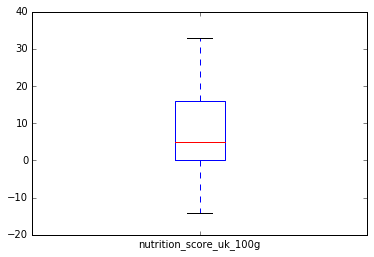

In [106]:
foodFacts.nutrition_score_uk_100g.plot.box()

### Solution 2.6
*Do you think there are more healthy or unhealthy foods in this data set? Is the data skewed? Explain.*

**First, a higher score means the food is more unhealthy. 
In this data set, the red line (2nd quartile/median) is on the healthy side, meaning there are more foods that are healthy.  Of note, the box plot is quite tall which indicates there is a wide range of values.**

Exercise 3: Who's Creating the Data? (30 points)
------------------------------------

Explore the "creator" column

Answer the following questions using basic pandas operations (sorting, groupby, aggregation):
1. How many unique creators are there in the data?
2. What percentage of items are created by open food facts contributers?
3. Find the top 10 creators
4. Create a bar plot of the number of contributions by each creator for the top 10 creators

Here's some relevant documentation:
http://pandas.pydata.org/pandas-docs/stable/groupby.html
http://pandas.pydata.org/pandas-docs/stable/visualization.html#bar-plots

Hints:
- Use groupby and size to get contributions per creator
- Just use the df.plot.bar() function without arguments don't worry about scaling or style.


### Solution 3.1
*How many unique creators are there in the data?*

**There are 1906 unique creators in the data.**

In [107]:
pd.unique(foodFacts.creator).size

1906

### Solution 3.2
*What percentage of items are created by open food facts contributers?*

**24.14% are Open Food Facts contributers**

In [108]:
round( 1.0 * foodFacts[foodFacts.creator == "openfoodfacts-contributors"].size / foodFacts.size * 100, 2)

24.14

### Solution 3.3
*Find the top 10 creators*

In [109]:
foodFacts.groupby(['creator']).size().sort_values(ascending=False)[:10]

creator
openfoodfacts-contributors    15814
tacite                         4452
date-limite-app                3980
sebleouf                       3260
tacinte                        3189
javichu                        2544
stephane                       2367
jeanbono                       1721
miles67off                     1406
teolemon                       1277
dtype: int64

### Solution 3.4
*Create a bar plot of the number of contributions by each creator for the top 10 creators*

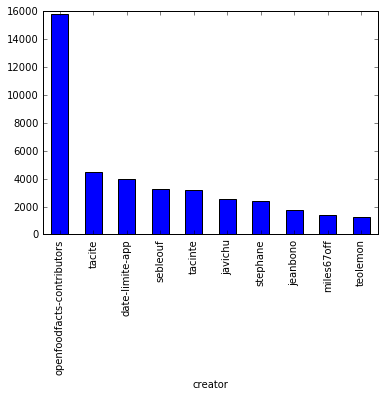

In [110]:
foodFacts.groupby(['creator']).size().sort_values(ascending=False)[:10].plot.bar()

Exercise 4: Modeling (30 points)
--------------------

Here we'll poke at the question "Is there good fat?"

1. Create a dataframe with only two columns "fat_100g" and "nutrition_score_uk_100g" (drop nulls)
2. Create a scatter plot with x being "fat_100g" and y being "nutrition_score_uk_100g"
3. Split the data into two random sets test and train (70% train, 30% test)
4. Fit a linear regression on the train dataset using x as "fat_100g" and y as "nutrition_score_uk_100g"
5. Predict nutrition score using the test set
6. Plot the scatter plot and line together
7. Do the results suprise you? What types of items a lot of fat? Do they have high nutrition scores?

Hint: Use code from in class exercise, just be careful not to accidentally swap x and y

### Solution 4.1
*Create a dataframe with only two columns "fat_100g" and "nutrition_score_uk_100g" (drop nulls)*

In [111]:
fatAndNutrition = foodFacts[['fat_100g', 'nutrition_score_uk_100g']].dropna(thresh=2)
fatAndNutrition.head(10)

,fat_100g,nutrition_score_uk_100g
10,7.0,10.0
11,7.0,10.0
13,0.0,2.0
16,0.0,2.0
22,0.0,14.0
23,0.0,6.0
29,18.0,13.0
46,0.5,14.0
48,29.1,26.0
52,20.8,20.0


### Solution 4.2
*Create a scatter plot with x being "fat_100g" and y being "nutrition_score_uk_100g"*

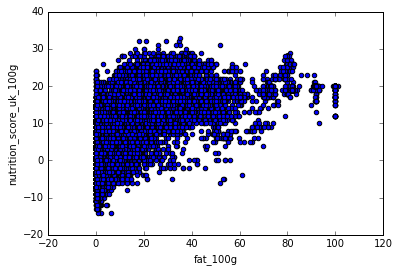

In [112]:
import matplotlib.pyplot as plt
fatAndNutrition.plot.scatter(x="fat_100g", y="nutrition_score_uk_100g")

### Solution 4.3
*Split the data into two random sets test and train (70% train, 30% test)*

In [113]:
mask = np.random.rand(len(fatAndNutrition)) < 0.7
train = fatAndNutrition[mask]
test = fatAndNutrition[~mask]

### Solution 4.4
*Fit a linear regression on the train dataset using x as "fat_100g" and y as "nutrition_score_uk_100g"*

In [114]:
from sklearn.linear_model import LinearRegression

x_train = train[['fat_100g']]
y_train = train['nutrition_score_uk_100g']
model = LinearRegression().fit(x_train,y_train)

### Solution 4.5
*Predict nutrition score using the test set*

In [115]:
predicted = model.predict(test[["fat_100g"]])

### Solution 4.6
*Plot the scatter plot and line together*

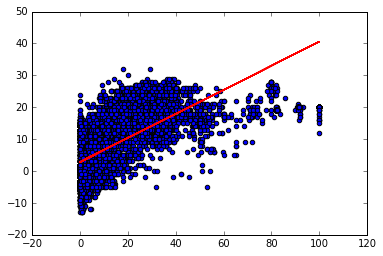

In [116]:
plt.scatter(test[['fat_100g']], test['nutrition_score_uk_100g'])
plt.plot(test[['fat_100g']], predicted, color='red')

### Solution 4.7
*Do the results suprise you? What types of items a lot of fat? Do they have high nutrition scores?*

**
The results aren't particularly surprising, but one thing that is interesting is that the highest fat content items are mostly olive oils. Being that they are plant-based items, the nutrition scores aren't nearly as high as the most unhealthy foods in the list.**

**As the fat content goes up, so does the nutrition score, and high nutrition scores are more unhealthy.  A further dive into the dataset could include the relationships between the different types of fat types and various other nutritional variables like trans-fat_100g, omega-9-fat_100g, and omega-6-fat_100g.**

**Based on the data shown in the 2nd table below, mostly sugary and salty snacks appear in the top of the most unhealthy categories (but not necessarily the most fat content).**

In [117]:
foodFacts.sort_values("fat_100g", ascending=False)[:8][["product_name", "main_category", "nutrition_score_uk_100g", "fat_100g"]]

,product_name,main_category,nutrition_score_uk_100g,fat_100g
57786,Ekstra Jomfru Olivenolie,NaN,20.0,101.0
30759,Préparation à l'Huile d'olive arôme Basilic Bi...,en:plant-based-foods-and-beverages,NaN,100.0
59939,Aceite de oliva virgen extra &quot;Esencia And...,es:huiles,12.0,100.0
59942,Aceite de oliva virgen extra &quot;Esencia And...,es:huiles,12.0,100.0
59941,Aceite de oliva virgen extra &quot;Esencia And...,en:plant-based-foods-and-beverages,12.0,100.0
30755,Huile d'Olive Vierge extra,en:plant-based-foods-and-beverages,20.0,100.0
30756,Huile d'olive vierge extra,en:plant-based-foods-and-beverages,20.0,100.0
30757,"Cauvin - Huile pimenté pour Pizza, Grillades e...",NaN,NaN,100.0


In [118]:
foodFacts.sort_values("nutrition_score_uk_100g", ascending=False)[["product_name","main_category", "nutrition_score_uk_100g"]][:8]

,product_name,main_category,nutrition_score_uk_100g
32338,Lait dessert origine république dominicaine,en:sugary-snacks,33.0
35993,Crackers,en:salty-snacks,32.0
14682,Mini Gaufres Cocktail,en:sugary-snacks,32.0
37031,Sablé au caramel et chocolat au lait,en:sugary-snacks,32.0
32336,tablette choc lait café,en:sugary-snacks,32.0
54050,Bites Strawberry,en:waffles,31.0
34575,Palets pur beurre,en:sugary-snacks,31.0
56325,Lait Amandes Caramélisées avec une pointe de sel,en:sugary-snacks,31.0


Exercise 5: Machine Learning Theory (15 points)
-----------------------------------

A lot of times simply applying the correct model makes more of a difference than clean data. This exercise shows off your knowledge of the theory behind different machine learning concepts.

1. If you were going to create your own nutritional rating, based off of (the very incomplete) UK and French rankings which class of machine learning model would you choose? Why? Which scikit learn model would you choose? Why? Assume your rating would be between 0 and 100.

2. If you wanted to group foods into 10 categories based on their nutritional facts and keywords in their product names, which type of machine learning model would you use? Why? Which scikit learn model would you choose? Why?

3. If you wanted to try to detect outliers (malicious users, data corruption, etc) what type of model could you use? Why? Is there anything in scikit learn that can handle this task?

### Solution 5.1
*If you were going to create your own nutritional rating, based off of (the very incomplete) UK and French rankings which class of machine learning model would you choose? Why? Which scikit learn model would you choose? Why? Assume your rating would be between 0 and 100.*

#### Machine Learning Model
With a rating prediction being a continuous continuous value between 0 and 100, we'd lean toward using some version of a regression model.  Based on the correlation below, and common sense, the two nutrition scores are highly correlated and may be able to contribute to a 0-100 ranking of our own.  Of note, even though there are missing values, due to the high correlation, it might not even be necessary to remove the NAs from the data with proper training.

Since the result would likely be linear, we'd expect that a **linear regression** would fit the best.  What we don't understand, though, is how you'd possibly train the model unless you came up with a rating using the same set of features in the dataset and then calculated the new ranking from there.

#### Scikit Learn Model
The model we were looking for wasn't really in the decision map: <http://scikit-learn.org/stable/tutorial/machine_learning_map/>.

Since we're looking to do a simple linear regression, then the ***LinearRegression*** model will work using the ordinary least squares.  There only two features in the data set (fr & uk scores), so it didn't make a lot of sense to try getting more complex with a Lasso or Ridge Regression.

size of fr_vs_uk: 31294


,nutrition_score_fr_100g,nutrition_score_uk_100g
nutrition_score_fr_100g,1.000000,0.959683
nutrition_score_uk_100g,0.959683,1.000000


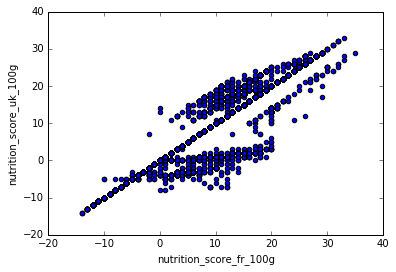

In [119]:
import matplotlib.pyplot as plt
fr_vs_uk = foodFacts[['nutrition_score_fr_100g', 'nutrition_score_uk_100g']].dropna(thresh=2)
print("size of fr_vs_uk: " + str(len(fr_vs_uk)))
fr_vs_uk.plot.scatter(x="nutrition_score_fr_100g", y="nutrition_score_uk_100g")
fr_vs_uk.corr()

### Solution 5.2
*If you wanted to group foods into 10 categories based on their nutritional facts and keywords in their product names, which type of machine learning model would you use? Why? Which scikit learn model would you choose? Why?*

#### Machine Learning Model
Grouping the foods into 10 categories is a classification activity.  Using some text based parsing as well as numerical data, we'd prefer to use a Bayesian classifier (Naive Bayes Network).  Based on the large number of nutritional facts and keywords available, a Bayes Network will allow for predictions that account for the features can influence other variables, or have natural relationships.

Another option would be a K-Neighbors classifier would do a reasonable job classifying the data.  The nearest category can be determined using any sort of distance calculation, like Euclidian distance.

#### Scikit Learning Model
For the Naive Bayes model, we'd first take a look at the multinomial naive bayes (MultinomialNB) model.  This particular model handles text and doesn't require a set of binary features/variables.
<http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB>

For the K-Neighbors Classifier, use the KNeighborsClassifier model in scikit learn.  This model is pretty straight forward and simple, while also having multiple different KNN algorithms available.
<http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier>

### Solution 5.3
*If you wanted to try to detect outliers (malicious users, data corruption, etc) what type of model could you use? Why? Is there anything in scikit learn that can handle this task?*

#### Machine Learning Model
There are many possible ways to do outlier detection.  A single-class support vector machine would do a fine job of finding outliers.  SVMs are very powerful and accurate for yes/no classifications.

A KNN technique would also be useful if you wanted to look at the densities of various clusters and find if some of the data points were not within the various densities.

#### Scikit Learning Model
ScikitLearn has a model called svm.OneClassSVM that can be used.  Though, the documentation compares it to the elliptical envelope, SVMs are quite powerful in their classification techniques for determining on/off (outlier/not-outlier) results.